In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


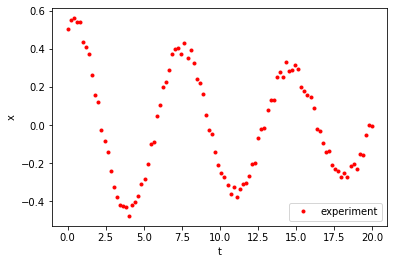

In [2]:
#data
d_out = np.genfromtxt("./data/hooks_law.txt")
t_range=d_out[:,0]
x_range=d_out[:,1]
plt.plot(d_out[:,0],d_out[:,1],"r.",label="experiment")
plt.xlabel("t")
plt.ylabel("x")
#plt.plot(t_range,[true_motion(t,x_0,v_0,k,b,m) for t in t_range],label = "theory curve")
plt.legend(loc=4)

In [3]:
#equation of motion (numpy)
def true_motion(t,x_0,v_0,k,b,m):
    w0 = sqrt(k/m)
    b0 = b/m
    
    if b0**2.-4.*w0**2.>0:
        raise NameError("Not underdamped system! "+ str(b0**2.-4.*w0**2.) )
        
    gamma = 1/2. *sqrt(4*w0**2. - b0**2.)
    print("gamma",4*w0**2. - b0**2.)
    A = x_0
    B = v_0 + 1/2.*gamma*x_0
    print("w0", w0, "b0",b0)
    return (A*cos(t*gamma)+B*sin(t*gamma))*exp(-b0*t/m)

In [4]:
#not really relevant here (isn't called)

def chi_squared(data,parameter_guess):
    x_0,v_0,k,b,m = parameter_guess
    t_array = data[:,0]
    x_experiment = data[:,1]
    x_guess = np.array([true_motion(t,x_0,v_0,k,b,m) for t in t_array])
    
    chi_squared = np.power((x_guess - x_experiment),2)/0.05
    
    return np.sum(chi_squared)
    

In [5]:
#true values
k = 8.25 #spring constant
sigma_x = 0.04 #uncertainty in the x measurement
x_0 = 0.5 #staring position
v_0 = 0.0 #starting velocity
b = 4. #damping
m = 10. #mass

gamma 3.1399999999999997
w0 0.9082951062292475 b0 0.4


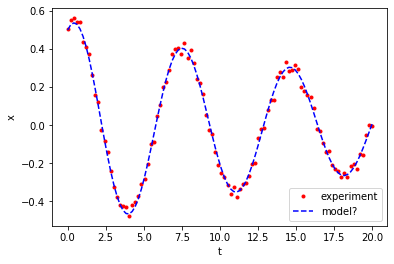

In [6]:
#plotting data and true model

d_out = np.genfromtxt("./data/hooks_law.txt")
t_range=d_out[:,0]
x_range=d_out[:,1]
plt.plot(d_out[:,0],d_out[:,1],"r.",label="experiment")
plt.plot(d_out[:,0],true_motion(d_out[:,0],x_0,v_0,k,b,m),"b--",label="model?")

plt.xlabel("t")
plt.ylabel("x")
#plt.plot(t_range,[true_motion(t,x_0,v_0,k,b,m) for t in t_range],label = "theory curve")
plt.legend(loc=4)

In [7]:
#defining variables for tensorflow model AND INITIALIZING VARIABLES!

import tensorflow as tf
import numpy
rng = numpy.random


X = tf.Variable([0.50,9.25,2.0], name="variables")

T = tf.placeholder("float")
Y = tf.placeholder("float")

n_samples = len(d_out[:,0])

In [8]:
#defining EoM in tensorflow

w0 = tf.sqrt(tf.divide(X[1],m))
b0 = tf.divide(X[2],m)


w02 = tf.multiply(4.0,tf.pow(w0,2))
b02 =tf.pow(b0,2)

inner = tf.subtract(w02,b02)
inner1 = tf.pow(inner,1.0/2.0)
gamma = tf.multiply(1/2.,inner1)
    
A = X[0]
B = tf.add(v_0,tf.multiply(1/2.,tf.multiply(gamma,X[0])))
inter1 = tf.multiply(A,tf.cos(tf.multiply(T,gamma)))
inter2 = tf.multiply(B,tf.sin(tf.multiply(T,gamma)))
pred = tf.multiply(tf.add(inter1,inter2),tf.exp(tf.multiply(tf.multiply(-1.0,b0),tf.divide(T,m))))

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [24]:
#tensorflow optmization./display parameters
learning_rate = 10.0
training_epochs = 1000
display_step = 50



#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,)
gradients, variables = zip(*optimizer.compute_gradients(cost))
gradients, _ = tf.clip_by_global_norm(gradients, 0.000000000001)
opt = optimizer.apply_gradients(zip(gradients, variables))

In [25]:
init = tf.global_variables_initializer()
learning_rate = 1.0

with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    for i in range(0,1000):
        print("Epoch:", '%04d' % (i+1),\
                    "X=", sess.run(X))
        opt.run(feed_dict={T: d_out[:,0], Y: d_out[:,1]})

        c = sess.run(cost, feed_dict={T: d_out[:,0], Y:d_out[:,1]})
        print("Epoch:", '%04d' % (i+1), "cost=", "{:.9f}".format(c), \
                    "X=", sess.run(X))

Epoch: 0001 X= [0.5  9.25 2.  ]
Epoch: 0001 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0002 X= [0.5  9.25 2.  ]
Epoch: 0002 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0003 X= [0.5  9.25 2.  ]
Epoch: 0003 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0004 X= [0.5  9.25 2.  ]
Epoch: 0004 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0005 X= [0.5  9.25 2.  ]
Epoch: 0005 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0006 X= [0.5  9.25 2.  ]
Epoch: 0006 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0007 X= [0.5  9.25 2.  ]
Epoch: 0007 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0008 X= [0.5  9.25 2.  ]
Epoch: 0008 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0009 X= [0.5  9.25 2.  ]
Epoch: 0009 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0010 X= [0.5  9.25 2.  ]
Epoch: 0010 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0011 X= [0.5  9.25 2.  ]
Epoch: 0011 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0012 X= [0.5  9.25 2.  ]
Epoch: 0012 cost= 0.020573199 X= [0.5  9.25 2.  ]
Epoch: 0013 X= [

Epoch: 0085 cost= 0.020573070 X= [0.4999982 9.25      2.       ]
Epoch: 0086 X= [0.4999982 9.25      2.       ]
Epoch: 0086 cost= 0.020573070 X= [0.49999818 9.25       2.        ]
Epoch: 0087 X= [0.49999818 9.25       2.        ]
Epoch: 0087 cost= 0.020573067 X= [0.49999815 9.25       2.        ]
Epoch: 0088 X= [0.49999815 9.25       2.        ]
Epoch: 0088 cost= 0.020573065 X= [0.49999812 9.25       2.        ]
Epoch: 0089 X= [0.49999812 9.25       2.        ]
Epoch: 0089 cost= 0.020573063 X= [0.4999981 9.25      2.       ]
Epoch: 0090 X= [0.4999981 9.25      2.       ]
Epoch: 0090 cost= 0.020573061 X= [0.49999806 9.25       2.        ]
Epoch: 0091 X= [0.49999806 9.25       2.        ]
Epoch: 0091 cost= 0.020573061 X= [0.49999803 9.25       2.        ]
Epoch: 0092 X= [0.49999803 9.25       2.        ]
Epoch: 0092 cost= 0.020573057 X= [0.499998 9.25     2.      ]
Epoch: 0093 X= [0.499998 9.25     2.      ]
Epoch: 0093 cost= 0.020573055 X= [0.49999797 9.25       2.        ]
Epoch: 0094 

Epoch: 0156 cost= 0.020572921 X= [0.4999961 9.25      2.       ]
Epoch: 0157 X= [0.4999961 9.25      2.       ]
Epoch: 0157 cost= 0.020572919 X= [0.49999607 9.25       2.        ]
Epoch: 0158 X= [0.49999607 9.25       2.        ]
Epoch: 0158 cost= 0.020572918 X= [0.49999604 9.25       2.        ]
Epoch: 0159 X= [0.49999604 9.25       2.        ]
Epoch: 0159 cost= 0.020572918 X= [0.499996 9.25     2.      ]
Epoch: 0160 X= [0.499996 9.25     2.      ]
Epoch: 0160 cost= 0.020572914 X= [0.49999598 9.25       2.        ]
Epoch: 0161 X= [0.49999598 9.25       2.        ]
Epoch: 0161 cost= 0.020572910 X= [0.49999595 9.25       2.        ]
Epoch: 0162 X= [0.49999595 9.25       2.        ]
Epoch: 0162 cost= 0.020572908 X= [0.49999592 9.25       2.        ]
Epoch: 0163 X= [0.49999592 9.25       2.        ]
Epoch: 0163 cost= 0.020572908 X= [0.4999959 9.25      2.       ]
Epoch: 0164 X= [0.4999959 9.25      2.       ]
Epoch: 0164 cost= 0.020572904 X= [0.49999586 9.25       2.        ]
Epoch: 0165 

Epoch: 0253 X= [0.49999323 9.25       2.        ]
Epoch: 0253 cost= 0.020572716 X= [0.4999932 9.25      2.       ]
Epoch: 0254 X= [0.4999932 9.25      2.       ]
Epoch: 0254 cost= 0.020572715 X= [0.49999318 9.25       2.        ]
Epoch: 0255 X= [0.49999318 9.25       2.        ]
Epoch: 0255 cost= 0.020572715 X= [0.49999315 9.25       2.        ]
Epoch: 0256 X= [0.49999315 9.25       2.        ]
Epoch: 0256 cost= 0.020572713 X= [0.49999312 9.25       2.        ]
Epoch: 0257 X= [0.49999312 9.25       2.        ]
Epoch: 0257 cost= 0.020572709 X= [0.4999931 9.25      2.       ]
Epoch: 0258 X= [0.4999931 9.25      2.       ]
Epoch: 0258 cost= 0.020572707 X= [0.49999306 9.25       2.        ]
Epoch: 0259 X= [0.49999306 9.25       2.        ]
Epoch: 0259 cost= 0.020572705 X= [0.49999303 9.25       2.        ]
Epoch: 0260 X= [0.49999303 9.25       2.        ]
Epoch: 0260 cost= 0.020572703 X= [0.499993 9.25     2.      ]
Epoch: 0261 X= [0.499993 9.25     2.      ]
Epoch: 0261 cost= 0.020572698 

Epoch: 0329 cost= 0.020572411 X= [0.49998888 9.25       2.        ]
Epoch: 0330 X= [0.49998888 9.25       2.        ]
Epoch: 0330 cost= 0.020572409 X= [0.49998882 9.25       2.        ]
Epoch: 0331 X= [0.49998882 9.25       2.        ]
Epoch: 0331 cost= 0.020572405 X= [0.49998876 9.25       2.        ]
Epoch: 0332 X= [0.49998876 9.25       2.        ]
Epoch: 0332 cost= 0.020572400 X= [0.4999887 9.25      2.       ]
Epoch: 0333 X= [0.4999887 9.25      2.       ]
Epoch: 0333 cost= 0.020572394 X= [0.49998865 9.25       2.        ]
Epoch: 0334 X= [0.49998865 9.25       2.        ]
Epoch: 0334 cost= 0.020572390 X= [0.4999886 9.25      2.       ]
Epoch: 0335 X= [0.4999886 9.25      2.       ]
Epoch: 0335 cost= 0.020572389 X= [0.49998853 9.25       2.        ]
Epoch: 0336 X= [0.49998853 9.25       2.        ]
Epoch: 0336 cost= 0.020572383 X= [0.49998847 9.25       2.        ]
Epoch: 0337 X= [0.49998847 9.25       2.        ]
Epoch: 0337 cost= 0.020572377 X= [0.4999884 9.25      2.       ]
Epo

Epoch: 0401 cost= 0.020572109 X= [0.4999846 9.25      2.       ]
Epoch: 0402 X= [0.4999846 9.25      2.       ]
Epoch: 0402 cost= 0.020572104 X= [0.49998453 9.25       2.        ]
Epoch: 0403 X= [0.49998453 9.25       2.        ]
Epoch: 0403 cost= 0.020572102 X= [0.49998447 9.25       2.        ]
Epoch: 0404 X= [0.49998447 9.25       2.        ]
Epoch: 0404 cost= 0.020572096 X= [0.4999844 9.25      2.       ]
Epoch: 0405 X= [0.4999844 9.25      2.       ]
Epoch: 0405 cost= 0.020572094 X= [0.49998435 9.25       2.        ]
Epoch: 0406 X= [0.49998435 9.25       2.        ]
Epoch: 0406 cost= 0.020572087 X= [0.4999843 9.25      2.       ]
Epoch: 0407 X= [0.4999843 9.25      2.       ]
Epoch: 0407 cost= 0.020572083 X= [0.49998423 9.25       2.        ]
Epoch: 0408 X= [0.49998423 9.25       2.        ]
Epoch: 0408 cost= 0.020572079 X= [0.49998417 9.25       2.        ]
Epoch: 0409 X= [0.49998417 9.25       2.        ]
Epoch: 0409 cost= 0.020572076 X= [0.49998412 9.25       2.        ]
Epoch:

Epoch: 0480 cost= 0.020571776 X= [0.49997988 9.25       2.        ]
Epoch: 0481 X= [0.49997988 9.25       2.        ]
Epoch: 0481 cost= 0.020571772 X= [0.49997982 9.25       2.        ]
Epoch: 0482 X= [0.49997982 9.25       2.        ]
Epoch: 0482 cost= 0.020571768 X= [0.49997976 9.25       2.        ]
Epoch: 0483 X= [0.49997976 9.25       2.        ]
Epoch: 0483 cost= 0.020571763 X= [0.4999797 9.25      2.       ]
Epoch: 0484 X= [0.4999797 9.25      2.       ]
Epoch: 0484 cost= 0.020571759 X= [0.49997965 9.25       2.        ]
Epoch: 0485 X= [0.49997965 9.25       2.        ]
Epoch: 0485 cost= 0.020571753 X= [0.4999796 9.25      2.       ]
Epoch: 0486 X= [0.4999796 9.25      2.       ]
Epoch: 0486 cost= 0.020571752 X= [0.49997953 9.25       2.        ]
Epoch: 0487 X= [0.49997953 9.25       2.        ]
Epoch: 0487 cost= 0.020571746 X= [0.49997947 9.25       2.        ]
Epoch: 0488 X= [0.49997947 9.25       2.        ]
Epoch: 0488 cost= 0.020571742 X= [0.4999794 9.25      2.       ]
Epo

Epoch: 0579 X= [0.49997404 9.25       2.        ]
Epoch: 0579 cost= 0.020571360 X= [0.49997398 9.25       2.        ]
Epoch: 0580 X= [0.49997398 9.25       2.        ]
Epoch: 0580 cost= 0.020571355 X= [0.49997392 9.25       2.        ]
Epoch: 0581 X= [0.49997392 9.25       2.        ]
Epoch: 0581 cost= 0.020571351 X= [0.49997386 9.25       2.        ]
Epoch: 0582 X= [0.49997386 9.25       2.        ]
Epoch: 0582 cost= 0.020571345 X= [0.4999738 9.25      2.       ]
Epoch: 0583 X= [0.4999738 9.25      2.       ]
Epoch: 0583 cost= 0.020571344 X= [0.49997374 9.25       2.        ]
Epoch: 0584 X= [0.49997374 9.25       2.        ]
Epoch: 0584 cost= 0.020571336 X= [0.49997368 9.25       2.        ]
Epoch: 0585 X= [0.49997368 9.25       2.        ]
Epoch: 0585 cost= 0.020571334 X= [0.49997362 9.25       2.        ]
Epoch: 0586 X= [0.49997362 9.25       2.        ]
Epoch: 0586 cost= 0.020571329 X= [0.49997357 9.25       2.        ]
Epoch: 0587 X= [0.49997357 9.25       2.        ]
Epoch: 0587 

Epoch: 0675 cost= 0.020570954 X= [0.49996826 9.25       2.        ]
Epoch: 0676 X= [0.49996826 9.25       2.        ]
Epoch: 0676 cost= 0.020570951 X= [0.4999682 9.25      2.       ]
Epoch: 0677 X= [0.4999682 9.25      2.       ]
Epoch: 0677 cost= 0.020570945 X= [0.49996814 9.25       2.        ]
Epoch: 0678 X= [0.49996814 9.25       2.        ]
Epoch: 0678 cost= 0.020570941 X= [0.49996808 9.25       2.        ]
Epoch: 0679 X= [0.49996808 9.25       2.        ]
Epoch: 0679 cost= 0.020570938 X= [0.49996802 9.25       2.        ]
Epoch: 0680 X= [0.49996802 9.25       2.        ]
Epoch: 0680 cost= 0.020570934 X= [0.49996796 9.25       2.        ]
Epoch: 0681 X= [0.49996796 9.25       2.        ]
Epoch: 0681 cost= 0.020570928 X= [0.4999679 9.25      2.       ]
Epoch: 0682 X= [0.4999679 9.25      2.       ]
Epoch: 0682 cost= 0.020570926 X= [0.49996784 9.25       2.        ]
Epoch: 0683 X= [0.49996784 9.25       2.        ]
Epoch: 0683 cost= 0.020570921 X= [0.49996778 9.25       2.        ]


Epoch: 0756 cost= 0.020570613 X= [0.49996343 9.25       2.        ]
Epoch: 0757 X= [0.49996343 9.25       2.        ]
Epoch: 0757 cost= 0.020570610 X= [0.49996337 9.25       2.        ]
Epoch: 0758 X= [0.49996337 9.25       2.        ]
Epoch: 0758 cost= 0.020570604 X= [0.4999633 9.25      2.       ]
Epoch: 0759 X= [0.4999633 9.25      2.       ]
Epoch: 0759 cost= 0.020570600 X= [0.49996325 9.25       2.        ]
Epoch: 0760 X= [0.49996325 9.25       2.        ]
Epoch: 0760 cost= 0.020570597 X= [0.4999632 9.25      2.       ]
Epoch: 0761 X= [0.4999632 9.25      2.       ]
Epoch: 0761 cost= 0.020570593 X= [0.49996313 9.25       2.        ]
Epoch: 0762 X= [0.49996313 9.25       2.        ]
Epoch: 0762 cost= 0.020570587 X= [0.49996307 9.25       2.        ]
Epoch: 0763 X= [0.49996307 9.25       2.        ]
Epoch: 0763 cost= 0.020570584 X= [0.49996302 9.25       2.        ]
Epoch: 0764 X= [0.49996302 9.25       2.        ]
Epoch: 0764 cost= 0.020570580 X= [0.49996296 9.25       2.        ]


Epoch: 0865 cost= 0.020570153 X= [0.49995694 9.25       2.        ]
Epoch: 0866 X= [0.49995694 9.25       2.        ]
Epoch: 0866 cost= 0.020570150 X= [0.49995688 9.25       2.        ]
Epoch: 0867 X= [0.49995688 9.25       2.        ]
Epoch: 0867 cost= 0.020570146 X= [0.49995682 9.25       2.        ]
Epoch: 0868 X= [0.49995682 9.25       2.        ]
Epoch: 0868 cost= 0.020570142 X= [0.49995676 9.25       2.        ]
Epoch: 0869 X= [0.49995676 9.25       2.        ]
Epoch: 0869 cost= 0.020570140 X= [0.4999567 9.25      2.       ]
Epoch: 0870 X= [0.4999567 9.25      2.       ]
Epoch: 0870 cost= 0.020570135 X= [0.49995664 9.25       2.        ]
Epoch: 0871 X= [0.49995664 9.25       2.        ]
Epoch: 0871 cost= 0.020570129 X= [0.49995658 9.25       2.        ]
Epoch: 0872 X= [0.49995658 9.25       2.        ]
Epoch: 0872 cost= 0.020570125 X= [0.49995652 9.25       2.        ]
Epoch: 0873 X= [0.49995652 9.25       2.        ]
Epoch: 0873 cost= 0.020570120 X= [0.49995646 9.25       2.    

Epoch: 0937 cost= 0.020569852 X= [0.49995264 9.25       2.        ]
Epoch: 0938 X= [0.49995264 9.25       2.        ]
Epoch: 0938 cost= 0.020569846 X= [0.49995258 9.25       2.        ]
Epoch: 0939 X= [0.49995258 9.25       2.        ]
Epoch: 0939 cost= 0.020569842 X= [0.49995252 9.25       2.        ]
Epoch: 0940 X= [0.49995252 9.25       2.        ]
Epoch: 0940 cost= 0.020569839 X= [0.49995247 9.25       2.        ]
Epoch: 0941 X= [0.49995247 9.25       2.        ]
Epoch: 0941 cost= 0.020569835 X= [0.4999524 9.25      2.       ]
Epoch: 0942 X= [0.4999524 9.25      2.       ]
Epoch: 0942 cost= 0.020569829 X= [0.49995235 9.25       2.        ]
Epoch: 0943 X= [0.49995235 9.25       2.        ]
Epoch: 0943 cost= 0.020569826 X= [0.4999523 9.25      2.       ]
Epoch: 0944 X= [0.4999523 9.25      2.       ]
Epoch: 0944 cost= 0.020569820 X= [0.49995223 9.25       2.        ]
Epoch: 0945 X= [0.49995223 9.25       2.        ]
Epoch: 0945 cost= 0.020569814 X= [0.49995217 9.25       2.        ]


In [34]:
#running just one value through to debug (not needed to run before optimization)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    print(inner1.eval(feed_dict={T: d_out[:,0], Y:d_out[:,1]}))
    

1.9131126


In [35]:
#optimization scheme

init = tf.global_variables_initializer()

with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(d_out[:,0], d_out[:,1]):
            sess.run(optimizer, feed_dict={T: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={T: d_out[:,0], Y:d_out[:,1]})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "X=", sess.run(X))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={T: d_out[:,0], Y:d_out[:,1]})
    print("Training cost=", training_cost, "X=", sess.run(X), '\n')


Epoch: 0050 cost= 0.001689200 X= [0.37146658 8.016749   2.486795  ]
Epoch: 0100 cost= 0.001232922 X= [0.39435527 8.058479   2.7978556 ]
Epoch: 0150 cost= 0.000896635 X= [0.41526532 8.098664   3.0677865 ]
Epoch: 0200 cost= 0.000659496 X= [0.433911  8.135904  3.2983549]
Epoch: 0250 cost= 0.000499623 X= [0.45016855 8.169324   3.492407  ]
Epoch: 0300 cost= 0.000396772 X= [0.46406198 8.198512   3.6535316 ]
Epoch: 0350 cost= 0.000333970 X= [0.47572646 8.223433   3.7857316 ]
Epoch: 0400 cost= 0.000297981 X= [0.48537734 8.244322   3.893125  ]


KeyboardInterrupt: 

In [22]:
np.random.randn(3,3)

array([[-3.14594541, -0.0223384 ,  0.74700762],
       [-1.07244239, -0.88084862,  0.07919576],
       [-2.02331579, -0.63502204,  0.817943  ]])

In [26]:
X = tf.Variable([0.50,9.25,2.0], name="variables")
T = tf.placeholder("float")


In [27]:
f = T**2

In [30]:
r_g = tf.gradients(f,T)

In [31]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    print(r_g.eval(feed_dict={T: 3}))


AttributeError: 'list' object has no attribute 'eval'